In [16]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)


physicalrestraints= "downloaded_data/bq-results-20240413-184136-1713033859770.csv"

physical= pd.read_csv(physicalrestraints)
physical.head(10)

,subject_id,hadm_id,date,Non_Violent_Restraints,Non_Violent_Restraints_Ordered,Reason_for_Restraint_Acute_Medical_Surgical_V1,Reason_for_Restraint_Behavioral_V1,Reason_for_Restraint_Non_violent,Reason_for_Restraint_Violent,Reason_for_Restraint_Seclusion_Violent,Reason_for_Restraints_Non_Violent,Restraint_Non_violent,Restraint_Device_Non_Violent,Restraint_Device_Non_violent_1,Restraint_Device_Violent,Restraint_Location,Restraint_Location_V1,Restraint_Location_V2,Restraint_Ordered_Non_violent,Restraint_Type,Restraint_Seclusion_Observer_Sheet,Restraints_Violent,Restraints_Evaluated,Restraints_Evaluated_V1,Restraints_Evaluated_V2,Restraints_Ordered,Restraints_Ordered_Violent,Safety_Restraints_NCP_Expected_outcomes,Safety_Restraints_NCP_Goal,Safety_Restraints_NCP_Interventions,Safety_Restraints_NCP_Outcomes_met,Safety_Restraints_NCP_Plan_revised,Safety_Restraints_NCP_Problem_resolved,Side_Rails_Restraint,Violent_Restraints,Violent_Restraints_Ordered,insurance,language,marital_status,race,deathtime
0,10001884,26184834,2131-01-11,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
1,10001884,26184834,2131-01-12,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
2,10001884,26184834,2131-01-13,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Reapplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
3,10001884,26184834,2131-01-14,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Reapplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
4,10001884,26184834,2131-01-15,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
5,10001884,26184834,2131-01-16,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
6,10001884,26184834,2131-01-17,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
7,10001884,26184834,2131-01-18,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
8,10001884,26184834,2131-01-19,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2131-01-20 05:15:00
9,10002013,23581541,2160-05-18,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Discontinued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,SINGLE,OTHER,NaN


In [3]:
# unique patients with restraints
physical['hadm_id'].nunique()
# 27417

27417

In [29]:
# Mapping race
physical['race'] = physical['race'].str.lower()

# Define the mapping of values to be replaced, with lowercase keys
race_mapping = {
    'asian - asian indian': 'Asian',
    'asian - chinese': 'Asian',
    'asian - korean': 'Asian',
    'asian': "Asian", 
    'asian - south east asian': 'Asian',
    'black/african': 'Black/African American',
    'black/cape verdean': 'Black/African American',
    'black/caribbean island': 'Black/African American',
    'black/african american' : 'Black/African American',
    'hispanic/latino' : 'Hispanic/Latino', 
    'hispanic/latino - central american': 'Hispanic/Latino',
    'hispanic/latino - columbian': 'Hispanic/Latino',
    'hispanic/latino - cuban': 'Hispanic/Latino',
    'hispanic/latino - dominican': 'Hispanic/Latino',
    'hispanic/latino - guatemalan': 'Hispanic/Latino',
    'hispanic/latino - honduran': 'Hispanic/Latino',
    'hispanic/latino - mexican': 'Hispanic/Latino',
    'hispanic/latino - puerto rican': 'Hispanic/Latino',
    'hispanic/latino - salvadoran': 'Hispanic/Latino',
    'multiple race/ethnicity': 'Other',
    'patient declined to answer': 'Other',
    'unable to obtain': 'Other',
    'unknown': 'Other',
    'other' : 'Other', 
    'portuguese': 'White',
    'white - brazilian': 'White',
    'white - eastern european': 'White',
    'white - other european': 'White',
    'white - russian': 'White',
    'white' : 'White',
    'american indian/alaska native': 'American Indian/Alaska Native',
    'hispanic or latino' : "Hispanic/Latino", 
    'native hawaiian or other pacific islander': "Native Hawaiian or Other Pacific Islander", 
    'south american' : "Hispanic/Latino"
}

# Replace values in the 'race' column using the mapping
physical['race'] = physical['race'].replace(race_mapping)

# Display the modified DataFrame
physical.head(10)

,subject_id,hadm_id,date,Non_Violent_Restraints,Non_Violent_Restraints_Ordered,Reason_for_Restraint_Acute_Medical_Surgical_V1,Reason_for_Restraint_Behavioral_V1,Reason_for_Restraint_Non_violent,Reason_for_Restraint_Violent,Reason_for_Restraint_Seclusion_Violent,Reason_for_Restraints_Non_Violent,Restraint_Non_violent,Restraint_Device_Non_Violent,Restraint_Device_Non_violent_1,Restraint_Device_Violent,Restraint_Location,Restraint_Location_V1,Restraint_Location_V2,Restraint_Ordered_Non_violent,Restraint_Type,Restraint_Seclusion_Observer_Sheet,Restraints_Violent,Restraints_Evaluated,Restraints_Evaluated_V1,Restraints_Evaluated_V2,Restraints_Ordered,Restraints_Ordered_Violent,Safety_Restraints_NCP_Expected_outcomes,Safety_Restraints_NCP_Goal,Safety_Restraints_NCP_Interventions,Safety_Restraints_NCP_Outcomes_met,Safety_Restraints_NCP_Plan_revised,Safety_Restraints_NCP_Problem_resolved,Side_Rails_Restraint,Violent_Restraints,Violent_Restraints_Ordered,insurance,language,marital_status,race,deathtime
0,10001884,26184834,2131-01-11,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
1,10001884,26184834,2131-01-12,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
2,10001884,26184834,2131-01-13,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Reapplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
3,10001884,26184834,2131-01-14,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Reapplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
4,10001884,26184834,2131-01-15,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
5,10001884,26184834,2131-01-16,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
6,10001884,26184834,2131-01-17,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
7,10001884,26184834,2131-01-18,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
8,10001884,26184834,2131-01-19,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Continued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00
9,10002013,23581541,2160-05-18,NaN,NaN,NaN,NaN,Treatment interference,NaN,NaN,NaN,On,NaN,Soft limb,NaN,Both arms,NaN,NaN,Done,NaN,NaN,NaN,Discontinued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,ENGLISH,SINGLE,Other,NaN


In [18]:
# Taking dataframe and calculating the number of restraint days
physical_df=physical.copy()
physical_df=physical.groupby('hadm_id').size().reset_index(name='restraintdays')

# Merge with the original DataFrame to get the other columns
physical_df = physical_df.merge(physical[['subject_id', 'hadm_id', 'insurance', 'language', 'marital_status', 'race', 'deathtime']].drop_duplicates(), on='hadm_id')

# Reordering columns as per requirement
physical_df = physical_df[['subject_id', 'hadm_id', 'restraintdays', 'insurance', 'language', 'marital_status', 'race', 'deathtime']]

# Displaying the resulting DataFrame
physical_df.head(10)


,subject_id,hadm_id,restraintdays,insurance,language,marital_status,race,deathtime
0,14990224,20000147,2,Medicare,ENGLISH,MARRIED,White,NaN
1,16003661,20001305,3,Medicare,ENGLISH,SINGLE,White,2178-03-27 19:23:00
2,10117812,20001770,1,Other,ENGLISH,SINGLE,White,NaN
3,10926139,20001811,3,Medicare,ENGLISH,SINGLE,White,NaN
4,18921218,20001976,1,Medicaid,ENGLISH,SINGLE,White,NaN
5,19476485,20002267,2,Medicare,ENGLISH,SINGLE,Black/African American,NaN
6,16230775,20002506,1,Other,ENGLISH,NaN,Other,NaN
7,18596567,20002950,1,Other,ENGLISH,SINGLE,White,NaN
8,17656146,20003587,1,Medicare,ENGLISH,MARRIED,Black/African American,2146-04-18 02:15:00
9,19657904,20004357,3,Medicare,ENGLISH,WIDOWED,Black/African American,NaN


In [7]:
# unique patients in physical restraint data
physical_df['hadm_id'].nunique()
#27417

27417

In [19]:
# Creating summary table
race_days = physical_df.groupby('race')['restraintdays'].mean().reset_index()
race_days['count'] = physical_df.groupby('race')['hadm_id'].nunique().reset_index()['hadm_id']

race_days

,race,restraintdays,count
0,American Indian/Alaska Native,4.714286,49
1,Asian,3.841667,720
2,Black/African American,4.291810,2320
3,Hispanic/Latino,3.804728,973
4,Native Hawaiian or Other Pacific Islander,4.850000,40
5,Other,4.004900,5102
6,White,3.676605,18213


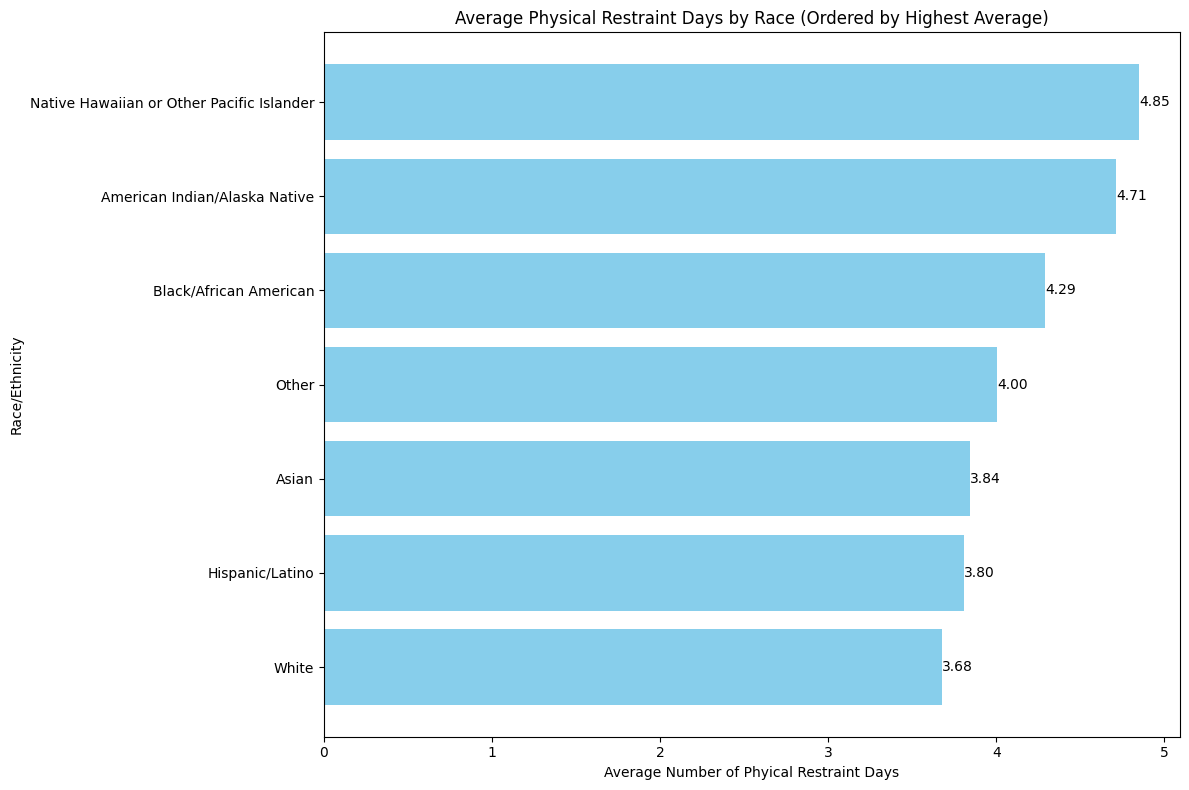

In [9]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'restraintdays' in descending order
race_days_sorted = race_days.sort_values(by='restraintdays', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(race_days_sorted['race'], race_days_sorted['restraintdays'], color='skyblue')

# Overlay actual values on the bars
for bar, value in zip(bars, race_days_sorted['restraintdays']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Average Number of Phyical Restraint Days')
plt.ylabel('Race/Ethnicity')
plt.title('Average Physical Restraint Days by Race (Ordered by Highest Average)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of restraint days on top
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
# import icustays
icustays= pd.read_csv('downloaded_data/icustays.csv')
icustays.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10004113,29879900,35200789,Neuro Stepdown,Neuro Stepdown,2173-03-20 20:16:36,2173-03-21 21:43:59,1.060683
1,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:44,2154-05-02 15:55:21,7.702512
2,10019607,24546857,34178938,Neuro Stepdown,Neuro Stepdown,2167-03-19 17:37:39,2167-03-21 13:12:28,1.815845
3,10023994,21824032,30439823,Neuro Stepdown,Neuro Stepdown,2146-07-19 15:32:22,2146-07-20 14:05:53,0.939942
4,10028930,26238833,33941522,Neuro Stepdown,Neuro Stepdown,2172-08-28 13:11:37,2172-08-29 14:19:35,1.047199


In [24]:
# Importing admissions table
from azure.storage.blob import BlobServiceClient
import io
import pandas as pd

# Set up the Azure Blob Storage connections
sas_token = "?sv=2022-11-02&ss=bfqt&srt=sco&sp=rwdlacupiytfx&se=2024-05-13T13:01:11Z&st=2024-04-13T05:01:11Z&spr=https,http&sig=X362UUEwAfkGDCBr2G0ZOc2SX%2FLg9LOddGvPHZ%2Fff00%3D"

datasets = {
    "admission": {
        "account_url": "https://sadukedatauseprod.blob.core.windows.net",
        "container_name": "mimiciv",
        "blob_name": "mimiciv/hosp/admissions.csv"
    },
    "patient": {
        "account_url": "https://sadukedatauseprod.blob.core.windows.net",
        "container_name": "mimiciv",
        "blob_name": "mimiciv/hosp/patients.csv"
    }
}

dfs = dict()
for dataset_name, dataset_config in datasets.items():
    print(f"Accessing {dataset_name} dataset:")

    # Create a BlobServiceClient using the account URL and SAS token
    blob_service_client = BlobServiceClient(
        account_url=dataset_config["account_url"],
        credential=sas_token
    )

    # Get a reference to the container
    container_client = blob_service_client.get_container_client(dataset_config["container_name"])

    # List the blobs in the container
    print(f"Blobs in the {dataset_name} container:")
    for blob in container_client.list_blobs():
        print(blob.name)

    # Read data from a specific blob (CSV file)
    blob_client = container_client.get_blob_client(dataset_config["blob_name"])

    # Download the blob content as text
    blob_content = blob_client.download_blob().readall().decode("utf-8")

    # Process the CSV data using pandas
    df = pd.read_csv(io.StringIO(blob_content))
    dfs[dataset_name]=df

Accessing admission dataset:
Blobs in the admission container:
mimiciv/hosp/admissions.csv
mimiciv/hosp/d_hcpcs.csv
mimiciv/hosp/d_icd_diagnoses.csv
mimiciv/hosp/d_icd_procedures.csv
mimiciv/hosp/d_labitems.csv
mimiciv/hosp/diagnoses_icd.csv
mimiciv/hosp/drgcodes.csv
mimiciv/hosp/emar.csv
mimiciv/hosp/emar_detail.csv
mimiciv/hosp/hcpcsevents.csv
mimiciv/hosp/labevents.csv
mimiciv/hosp/microbiologyevents.csv
mimiciv/hosp/omr.csv
mimiciv/hosp/patients.csv
mimiciv/hosp/pharmacy.csv
mimiciv/hosp/poe.csv
mimiciv/hosp/poe_detail.csv
mimiciv/hosp/prescriptions.csv
mimiciv/hosp/procedures_icd.csv
mimiciv/hosp/provider.csv
mimiciv/hosp/services.csv
mimiciv/hosp/transfers.csv
mimiciv/icu/caregiver.csv
mimiciv/icu/chartevents.csv
mimiciv/icu/d_items.csv
mimiciv/icu/datetimeevents.csv
mimiciv/icu/icustays.csv
mimiciv/icu/ingredientevents.csv
mimiciv/icu/inputevents.csv
mimiciv/icu/outputevents.csv
mimiciv/icu/procedureevents.csv
Accessing patient dataset:
Blobs in the patient container:
mimiciv/ho

In [32]:
admissions = dfs['admission']

# Replace values in the 'race' column using the mapping
admissions['race'] = admissions['race'].str.lower()
admissions['race'] = admissions['race'].replace(race_mapping)

admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,White,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,White,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,White,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,White,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,White,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [33]:
icu_admissions = pd.merge(icustays, admissions, on=['subject_id', 'hadm_id'])

icu_admissions.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004113,29879900,35200789,Neuro Stepdown,Neuro Stepdown,2173-03-20 20:16:36,2173-03-21 21:43:59,1.060683,2173-03-20 00:00:00,2173-03-22 14:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,White,NaN,NaN,0
1,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:44,2154-05-02 15:55:21,7.702512,2154-04-24 03:15:00,2154-05-03 14:00:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,DIVORCED,White,NaN,NaN,0
2,10019607,24546857,34178938,Neuro Stepdown,Neuro Stepdown,2167-03-19 17:37:39,2167-03-21 13:12:28,1.815845,2167-03-19 17:36:00,2167-03-21 12:55:00,NaN,URGENT,P88US1,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,SINGLE,Other,NaN,NaN,0
3,10023994,21824032,30439823,Neuro Stepdown,Neuro Stepdown,2146-07-19 15:32:22,2146-07-20 14:05:53,0.939942,2146-07-19 02:13:00,2146-07-20 13:00:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,SINGLE,Other,NaN,NaN,0
4,10028930,26238833,33941522,Neuro Stepdown,Neuro Stepdown,2172-08-28 13:11:37,2172-08-29 14:19:35,1.047199,2172-08-28 13:09:00,2172-08-29 14:15:00,NaN,DIRECT OBSERVATION,P898NM,TRANSFER FROM HOSPITAL,NaN,Other,ENGLISH,NaN,Asian,NaN,NaN,0


In [34]:
# Merge the DataFrames on subject_id and hadm_id
merged_df = pd.merge(icu_admissions, physical_df, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_restrained'))

# Indicator for whether the row has restraint data
merged_df['is_restrained'] = merged_df['race_restrained'].notna()

# Group by race from the all_patients DataFrame
grouped = merged_df.groupby('race')

# Calculate the counts and percentage
race_stats = grouped.agg(
    total_patients=('subject_id', 'count'),
    restrained_patients=('is_restrained', 'sum')
)
race_stats['percentage_restrained'] = (race_stats['restrained_patients'] / race_stats['total_patients']) * 100

# Reset index to make 'race' a column again
race_stats.reset_index(inplace=True)

# Display the result
print(race_stats[['race', 'total_patients', 'restrained_patients', 'percentage_restrained']])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_8438/1691105129.py", line 15, in <module>
    race_stats['percentage_restrained'] = (race_stats['restrained_patients'] / race_stats['total_patients']) * 100
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/ops/common.py", line 65, in new_method
    is_cmp = stripped_name in {"eq", "ne", "lt", "le", "gt", "ge"}
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/ops/__init__.py", line 343, in wrapper
    assert isinstance(left, ABCDataFrame)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 190, in arithmetic_op
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 140, in na_arithmetic_op
  File "/anaconda/envs/

In [10]:
# Pharmacological Restraint Data

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)


pharmacologicalrestraints = "downloaded_data/medical_restraints_2.csv"

pharm= pd.read_csv(pharmacologicalrestraints)
pharm.head(10)

,subject_id,hadm_id,insurance,language,marital_status,race,gender,anchor_age,chartdate,intime,outtime,total_dose_lorazepam,total_dose_diazepam,total_dose_midazolam,total_dose_ziprasidone,total_dose_aripiprazole,total_dose_haloperidol,total_dose_olanzapine,total_dose_paliperidone,total_dose_prochlorperazine,total_dose_chlorpromazine,total_dose_droperidol
0,10001884,26184834,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,F,68,2131-01-12,2131-01-11 04:20:05,2131-01-20 08:27:30,1.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
1,10004720,22081550,Medicare,ENGLISH,SINGLE,WHITE,M,61,2186-11-17,2186-11-12 19:55:00,2186-11-17 21:15:55,4.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
2,10005606,29646384,Other,ENGLISH,SINGLE,WHITE,M,38,2143-12-08,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,6.0,0,0,0.0,0.0,0,0,0.0,0
3,10005606,29646384,Other,ENGLISH,SINGLE,WHITE,M,38,2143-12-10,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,4.0,0,0,5.0,0.0,0,0,0.0,0
4,10005606,29646384,Other,ENGLISH,SINGLE,WHITE,M,38,2143-12-09,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,4.0,0,0,0.0,0.0,0,0,0.0,0
5,10007818,22987108,Medicare,ENGLISH,MARRIED,WHITE,M,69,2146-07-12,2146-06-22 11:46:29,2146-07-13 00:27:47,0.5,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
6,10010058,26359957,Other,?,MARRIED,ASIAN - SOUTH EAST ASIAN,M,80,2147-11-18,2147-11-18 03:19:00,2147-11-19 08:53:33,0.0,0.0,4.0,0,0,0.0,0.0,0,0,0.0,0
7,10010058,26359957,Other,?,MARRIED,ASIAN - SOUTH EAST ASIAN,M,80,2147-11-19,2147-11-18 03:19:00,2147-11-19 08:53:33,0.0,0.0,2.0,0,0,0.0,0.0,0,0,0.0,0
8,10010867,22429197,Other,ENGLISH,SINGLE,WHITE - BRAZILIAN,F,28,2148-01-04,2147-12-30 09:33:00,2148-01-08 18:14:21,2.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
9,10010867,22429197,Other,ENGLISH,SINGLE,WHITE - BRAZILIAN,F,28,2148-01-05,2147-12-30 09:33:00,2148-01-08 18:14:21,2.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0


In [11]:
# Mapping race
pharm['race'] = pharm['race'].str.lower()

# Replace values in the 'race' column using the mapping
pharm['race'] = pharm['race'].replace(race_mapping)

# Display the modified DataFrame
pharm.head(10)

,subject_id,hadm_id,insurance,language,marital_status,race,gender,anchor_age,chartdate,intime,outtime,total_dose_lorazepam,total_dose_diazepam,total_dose_midazolam,total_dose_ziprasidone,total_dose_aripiprazole,total_dose_haloperidol,total_dose_olanzapine,total_dose_paliperidone,total_dose_prochlorperazine,total_dose_chlorpromazine,total_dose_droperidol
0,10001884,26184834,Medicare,ENGLISH,MARRIED,Black/African American,F,68,2131-01-12,2131-01-11 04:20:05,2131-01-20 08:27:30,1.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
1,10004720,22081550,Medicare,ENGLISH,SINGLE,White,M,61,2186-11-17,2186-11-12 19:55:00,2186-11-17 21:15:55,4.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
2,10005606,29646384,Other,ENGLISH,SINGLE,White,M,38,2143-12-08,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,6.0,0,0,0.0,0.0,0,0,0.0,0
3,10005606,29646384,Other,ENGLISH,SINGLE,White,M,38,2143-12-10,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,4.0,0,0,5.0,0.0,0,0,0.0,0
4,10005606,29646384,Other,ENGLISH,SINGLE,White,M,38,2143-12-09,2143-12-06 02:08:00,2143-12-12 16:25:18,0.0,0.0,4.0,0,0,0.0,0.0,0,0,0.0,0
5,10007818,22987108,Medicare,ENGLISH,MARRIED,White,M,69,2146-07-12,2146-06-22 11:46:29,2146-07-13 00:27:47,0.5,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
6,10010058,26359957,Other,?,MARRIED,Asian,M,80,2147-11-18,2147-11-18 03:19:00,2147-11-19 08:53:33,0.0,0.0,4.0,0,0,0.0,0.0,0,0,0.0,0
7,10010058,26359957,Other,?,MARRIED,Asian,M,80,2147-11-19,2147-11-18 03:19:00,2147-11-19 08:53:33,0.0,0.0,2.0,0,0,0.0,0.0,0,0,0.0,0
8,10010867,22429197,Other,ENGLISH,SINGLE,White,F,28,2148-01-04,2147-12-30 09:33:00,2148-01-08 18:14:21,2.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0
9,10010867,22429197,Other,ENGLISH,SINGLE,White,F,28,2148-01-05,2147-12-30 09:33:00,2148-01-08 18:14:21,2.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0


In [12]:
# Taking dataframe and calculating the number of restraint days
pharm_df=pharm.copy()
pharm_df=pharm.groupby('hadm_id').size().reset_index(name='restraintdays')

# Merge with the original DataFrame to get the other columns
pharm_df = pharm_df.merge(pharm[['subject_id', 'hadm_id', 'insurance', 'language', 'marital_status', 'race']].drop_duplicates(), on='hadm_id')

# Reordering columns as per requirement
pharm_df = pharm_df[['subject_id', 'hadm_id', 'restraintdays', 'insurance', 'language', 'marital_status', 'race']]

# Sort by subject_id
pharm_df = pharm_df.sort_values(by='subject_id')

# Displaying the resulting DataFrame
pharm_df.head(10)

,subject_id,hadm_id,restraintdays,insurance,language,marital_status,race
3563,10001884,26184834,1,Medicare,ENGLISH,MARRIED,Black/African American
1153,10004720,22081550,1,Medicare,ENGLISH,SINGLE,White
5544,10005606,29646384,3,Other,ENGLISH,SINGLE,White
1679,10007818,22987108,1,Medicare,ENGLISH,MARRIED,White
3649,10010058,26359957,2,Other,?,MARRIED,Asian
1353,10010867,22429197,5,Other,ENGLISH,SINGLE,White
3867,10011365,26712576,1,Medicare,ENGLISH,WIDOWED,White
115,10011427,20219031,1,Other,ENGLISH,MARRIED,White
1548,10012438,22764825,2,Medicare,ENGLISH,SINGLE,White
1841,10014610,23258342,1,Medicare,ENGLISH,MARRIED,Black/African American


In [13]:
# unique patients in pharmacological restraint data
pharm_df['hadm_id'].nunique()
# 5753

5744

In [14]:
# Creating summary table
racerx_days = pharm_df.groupby('race')['restraintdays'].mean().reset_index()
racerx_days['count'] = pharm_df.groupby('race')['hadm_id'].nunique().reset_index()['hadm_id']

racerx_days

,race,restraintdays,count
0,American Indian/Alaska Native,1.461538,13
1,Asian,1.814815,135
2,Black/African American,2.090741,540
3,Hispanic/Latino,2.385027,187
4,Native Hawaiian or Other Pacific Islander,2.315789,19
5,Other,2.304269,1101
6,White,2.104294,3749


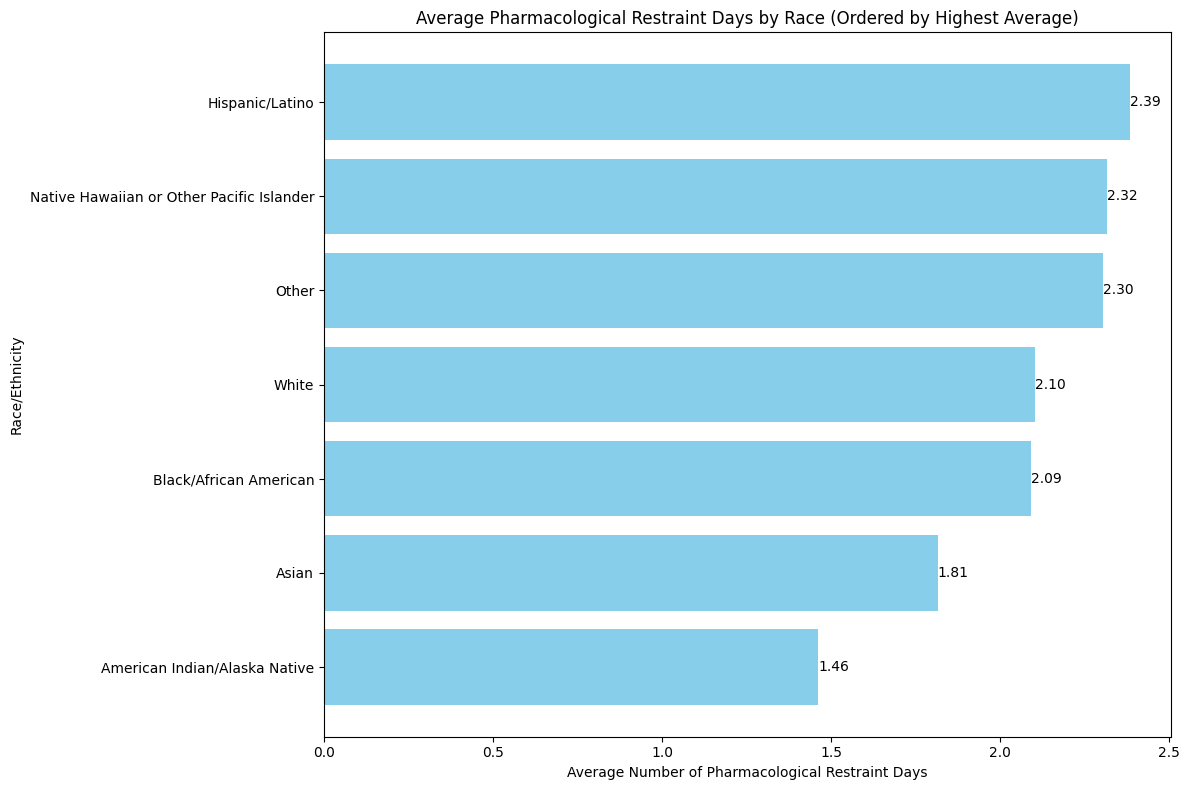

In [15]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'restraintdays' in descending order
racerx_days_sorted = racerx_days.sort_values(by='restraintdays', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(racerx_days_sorted['race'], racerx_days_sorted['restraintdays'], color='skyblue')

# Overlay actual values on the bars
for bar, value in zip(bars, racerx_days_sorted['restraintdays']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Average Number of Pharmacological Restraint Days')
plt.ylabel('Race/Ethnicity')
plt.title('Average Pharmacological Restraint Days by Race (Ordered by Highest Average)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of restraint days on top
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [16]:
# # Describing the number of each medication used (for descriptive purposes only) --- NOT WORKING, NEED TO UPDATE if want this data

# # Group by 'subject_id' and 'chartdate' and iterate over the columns after 'chartdate'
# result = []
# for _, group in pharm_df.groupby(['subject_id', 'chartdate']):
#     group_data = group.iloc[0]  # Take the first row of each group
#     for col in group.columns:
#         if col.startswith('total_dose_') and group_data[col] != 0:
#             new_row = group_data[['subject_id', 'insurance', 'language', 'marital_status', 'race', 'gender', 'anchor_age', 'chartdate']].copy()
#             new_row['medication'] = col
#             new_row['dose'] = group_data[col]
#             result.append(new_row)

# # Concatenate the resulting rows into a new DataFrame
# result_df = pd.concat(result, axis=1).T

# # Reset the index
# result_df.reset_index(drop=True, inplace=True)

In [17]:
# Merge the DataFrames on 'subject_id' and 'hadm_id' with an outer join
combined_df = pd.merge(pharm_df, physical_df, on=['subject_id', 'hadm_id'], how='outer')

# Fill missing values with 0
combined_df['pharmrestraintdays'] = combined_df['restraintdays_x'].fillna(0)
combined_df['physicalrestraintdays'] = combined_df['restraintdays_y'].fillna(0)

# Drop the original restraintdays columns if necessary
combined_df.drop(columns=['restraintdays_x', 'restraintdays_y'], inplace=True)

# Drop duplicate columns
combined_df.drop(columns=['insurance_y', 'language_y', 'marital_status_y', 'race_y'], inplace=True)

# Rename the remaining columns
combined_df.rename(columns={'insurance_x': 'insurance', 'language_x': 'language',
                            'marital_status_x': 'marital_status', 'race_x': 'race'}, inplace=True)


combined_df.head(10)


,subject_id,hadm_id,insurance,language,marital_status,race,deathtime,pharmrestraintdays,physicalrestraintdays
0,10001884,26184834,Medicare,ENGLISH,MARRIED,Black/African American,2131-01-20 05:15:00,1.0,9.0
1,10004720,22081550,Medicare,ENGLISH,SINGLE,White,2186-11-17 18:30:00,1.0,4.0
2,10005606,29646384,Other,ENGLISH,SINGLE,White,NaN,3.0,6.0
3,10007818,22987108,Medicare,ENGLISH,MARRIED,White,2146-07-12 20:50:00,1.0,10.0
4,10010058,26359957,Other,?,MARRIED,Asian,2147-11-19 04:00:00,2.0,1.0
5,10010867,22429197,Other,ENGLISH,SINGLE,White,NaN,5.0,10.0
6,10011365,26712576,Medicare,ENGLISH,WIDOWED,White,2166-02-20 00:20:00,1.0,8.0
7,10011427,20219031,Other,ENGLISH,MARRIED,White,NaN,1.0,2.0
8,10012438,22764825,Medicare,ENGLISH,SINGLE,White,NaN,2.0,0.0
9,10014610,23258342,Medicare,ENGLISH,MARRIED,Black/African American,NaN,1.0,3.0


In [18]:
# unique patients in pharmacological restraint data
combined_df['hadm_id'].nunique()
# 29471

29462

In [19]:
# Neither dataframe

import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)


norestraints = "downloaded_data/neither.csv"

no = pd.read_csv(norestraints)
no

# 38862 rows total - but duplicate subject_id, didn't remove these at this time because want to bring in hadm_id and stay_id

,subject_id,stay_id,hadm_id,insurance,language,marital_status,race
0,10786070,37724991,29289999,Other,ENGLISH,MARRIED,WHITE
1,13024347,35698364,21355222,Other,ENGLISH,SINGLE,WHITE
2,13484152,35078394,21503453,Other,ENGLISH,MARRIED,WHITE
3,13609009,36896921,22170101,Medicare,ENGLISH,WIDOWED,WHITE
4,13851330,39444788,21339457,Other,?,MARRIED,HISPANIC/LATINO - CENTRAL AMERICAN
...,...,...,...,...,...,...,...
38857,19911133,32315584,25625808,Medicare,ENGLISH,WIDOWED,WHITE
38858,19928907,38684003,20127009,Medicaid,?,MARRIED,OTHER
38859,19928907,38684003,20127009,Medicaid,?,MARRIED,UNKNOWN
38860,19957626,38817551,23821950,Other,ENGLISH,MARRIED,WHITE - OTHER EUROPEAN


In [20]:
# unique patients in pharmacological restraint data
no['subject_id'].nunique()
# 24683

24683

In [21]:
# Mapping race
no['race'] = no['race'].str.lower()

# Replace values in the 'race' column using the mapping
no['race'] = no['race'].replace(race_mapping)

# Display the modified DataFrame
no.head(10)


,subject_id,stay_id,hadm_id,insurance,language,marital_status,race
0,10786070,37724991,29289999,Other,ENGLISH,MARRIED,White
1,13024347,35698364,21355222,Other,ENGLISH,SINGLE,White
2,13484152,35078394,21503453,Other,ENGLISH,MARRIED,White
3,13609009,36896921,22170101,Medicare,ENGLISH,WIDOWED,White
4,13851330,39444788,21339457,Other,?,MARRIED,Hispanic/Latino
5,13883022,39923997,26259555,Other,?,MARRIED,Other
6,14041510,36713711,26602358,Other,ENGLISH,SINGLE,White
7,16313008,32226077,25236017,Other,ENGLISH,DIVORCED,White
8,17017707,30566101,22354445,Other,ENGLISH,MARRIED,Other
9,18766342,30509339,27513687,Other,ENGLISH,SINGLE,Other


### Joining no and combined

In [22]:
combined_df.columns

Index(['subject_id', 'hadm_id', 'insurance', 'language', 'marital_status',
       'race', 'deathtime', 'pharmrestraintdays', 'physicalrestraintdays'],
      dtype='object')

In [23]:
no.columns

Index(['subject_id', 'stay_id', 'hadm_id', 'insurance', 'language',
       'marital_status', 'race'],
      dtype='object')

In [24]:
# Drop deathtime from combined_df
combined_df.drop(columns=['deathtime'], inplace=True)

# Add 'pharmrestraintdays' and 'physicalrestraintdays' columns with NaN values
no['pharmrestraintdays'] = float('nan')
no['physicalrestraintdays'] = float('nan')

# Concatenate both DataFrames
combined_df = pd.concat([no, combined_df], ignore_index=True)

# Display the concatenated DataFrame
combined_df


,subject_id,stay_id,hadm_id,insurance,language,marital_status,race,pharmrestraintdays,physicalrestraintdays
0,10786070,37724991.0,29289999,Other,ENGLISH,MARRIED,White,NaN,NaN
1,13024347,35698364.0,21355222,Other,ENGLISH,SINGLE,White,NaN,NaN
2,13484152,35078394.0,21503453,Other,ENGLISH,MARRIED,White,NaN,NaN
3,13609009,36896921.0,22170101,Medicare,ENGLISH,WIDOWED,White,NaN,NaN
4,13851330,39444788.0,21339457,Other,?,MARRIED,Hispanic/Latino,NaN,NaN
...,...,...,...,...,...,...,...,...,...
68319,17660536,NaN,29997844,NaN,NaN,NaN,NaN,0.0,2.0
68320,17624950,NaN,29998113,NaN,NaN,NaN,NaN,0.0,1.0
68321,19989305,NaN,29998115,NaN,NaN,NaN,NaN,0.0,2.0
68322,15129243,NaN,29999098,NaN,NaN,NaN,NaN,0.0,9.0


In [25]:
# Summarizing the No Restraints group

race_counts = no.groupby('race')['subject_id'].count().reset_index()
race_counts.columns = ['Race', 'Count']
race_counts

,Race,Count
0,American Indian/Alaska Native,75
1,Asian,1366
2,Black/African American,5029
3,Hispanic/Latino,1843
4,Native Hawaiian or Other Pacific Islander,46
5,Other,4658
6,White,25845


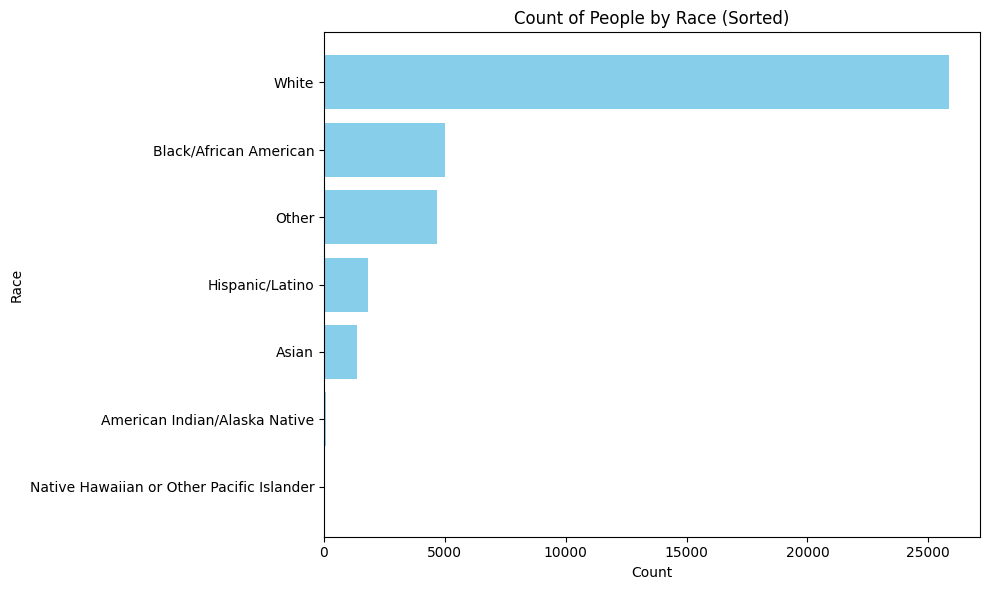

In [26]:
# Plot of No restraints group

# Sorting by Count column in descending order
race_counts = race_counts.sort_values(by='Count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(race_counts['Race'], race_counts['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Count of People by Race (Sorted)')
plt.tight_layout()

# Displaying the plot
plt.show()


In [27]:
# Combining pharm, physical, and neither dataframes together

# Assuming combined_df and no are your DataFrames
# Merge the two DataFrames on subject_id, insurance, language, marital_status, and race
# merged_df = pd.merge(combined_df, no, on=['subject_id', 'hadm_id'], how='outer')

merged_df= combined_df

# Create a new column 'restrainttype' based on conditions
merged_df['restrainttype'] = 'None'
merged_df.loc[(merged_df['physicalrestraintdays'].isna()) & (merged_df['pharmrestraintdays'].isna()), 'restrainttype'] = 'None'
merged_df.loc[(merged_df['physicalrestraintdays'] > 0) & (merged_df['pharmrestraintdays'] == 0), 'restrainttype'] = 'Physical'
merged_df.loc[(merged_df['pharmrestraintdays'] > 0) & (merged_df['physicalrestraintdays'] == 0), 'restrainttype'] = 'Medical'
merged_df.loc[(merged_df['physicalrestraintdays'] > 0) & (merged_df['pharmrestraintdays'] > 0), 'restrainttype'] = 'Physical and Medical'

# Drop duplicate columns (_y) for insurance, language, marital_status, and race if they exist
columns_to_drop = ['insurance_y', 'language_y', 'marital_status_y', 'race_y']
merged_df = merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns], errors='ignore')

# Optionally, rename the remaining duplicate columns (_x) to remove the suffix
merged_df = merged_df.rename(columns={'insurance_x': 'insurance', 'language_x': 'language', 'marital_status_x': 'marital_status', 'race_x': 'race'})

merged_df


,subject_id,stay_id,hadm_id,insurance,language,marital_status,race,pharmrestraintdays,physicalrestraintdays,restrainttype
0,10786070,37724991.0,29289999,Other,ENGLISH,MARRIED,White,NaN,NaN,None
1,13024347,35698364.0,21355222,Other,ENGLISH,SINGLE,White,NaN,NaN,None
2,13484152,35078394.0,21503453,Other,ENGLISH,MARRIED,White,NaN,NaN,None
3,13609009,36896921.0,22170101,Medicare,ENGLISH,WIDOWED,White,NaN,NaN,None
4,13851330,39444788.0,21339457,Other,?,MARRIED,Hispanic/Latino,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
68319,17660536,NaN,29997844,NaN,NaN,NaN,NaN,0.0,2.0,Physical
68320,17624950,NaN,29998113,NaN,NaN,NaN,NaN,0.0,1.0,Physical
68321,19989305,NaN,29998115,NaN,NaN,NaN,NaN,0.0,2.0,Physical
68322,15129243,NaN,29999098,NaN,NaN,NaN,NaN,0.0,9.0,Physical


In [28]:
# Looking at total numbers
summary_table = merged_df.groupby('restrainttype').agg({'subject_id': 'count', 'hadm_id': 'nunique'})
summary_table.columns = ['subject_id_count', 'hadm_id_count']
summary_table

# there are duplicate patients in subject_id, especially for None, remove duplicates for all? and limit to first encounteR? 

,subject_id_count,hadm_id_count
restrainttype,,
Medical,2045,2045
None,38862,28948
Physical,23718,23718
Physical and Medical,3699,3699


In [29]:
!pip install azure-storage-blob

## Importing and Incorporating Admissions Table

In [31]:
admissions = dfs['admission']
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [32]:
patients = dfs['patient']
print("total rows: ", len(patients.index))
patients

total rows:  299712


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [33]:
# Cleaning Merged dataframe - dropping all variables and merging back in with admissions dataframe

# Drop all variables from merged_df except subject_id, hadm_id, and pharmrestraintday
merged_df = merged_df[['subject_id', 'hadm_id', 'pharmrestraintdays', 'physicalrestraintdays', 'restrainttype' ]].copy()

# Join variables from admissions dataframe
merged_df = merged_df.merge(admissions[['hadm_id', 'admittime', 'dischtime', 'deathtime', 'race', 'hospital_expire_flag']], on='hadm_id', how='left')

# Replace values in the 'race' column using the mapping
merged_df['race'] = merged_df['race'].str.lower()

merged_df['race'] = merged_df['race'].replace(race_mapping)

# Define conditions for the new column
conditions = [
    (merged_df['restrainttype'].isin(['Medical', 'Physical', 'Physical and Medical'])),
    (merged_df['restrainttype'] == 'None')
]

# Define values for each condition
values = ['Restraints', 'No Restraints']

# Create the new column based on conditions
merged_df['restraint_status'] = np.select(conditions, values, default='Unknown')

# Sort merged_df first by subject_id (smallest to largest) then by hadm_id (smallest to largest)
merged_df_sorted = merged_df.sort_values(by=['subject_id', 'hadm_id'])

# Remove all duplicate entries keeping the earliest hadm_id
merged_df_unique = merged_df_sorted.drop_duplicates(subset='subject_id', keep='first')


merged_df

#68324 before removing duplicates
# same number after duplicates removed

,subject_id,hadm_id,pharmrestraintdays,physicalrestraintdays,restrainttype,admittime,dischtime,deathtime,race,hospital_expire_flag,restraint_status
0,10786070,29289999,NaN,NaN,None,2113-01-22 00:00:00,2113-01-23 14:20:00,NaN,White,0,No Restraints
1,13024347,21355222,NaN,NaN,None,2143-11-13 06:22:00,2143-11-14 14:45:00,NaN,White,0,No Restraints
2,13484152,21503453,NaN,NaN,None,2121-10-29 00:00:00,2121-10-31 12:20:00,NaN,White,0,No Restraints
3,13609009,22170101,NaN,NaN,None,2187-07-24 20:35:00,2187-07-25 14:00:00,NaN,White,0,No Restraints
4,13851330,21339457,NaN,NaN,None,2181-09-29 08:09:00,2181-09-30 13:55:00,NaN,Hispanic/Latino,0,No Restraints
...,...,...,...,...,...,...,...,...,...,...,...
68319,17660536,29997844,0.0,2.0,Physical,2125-02-16 20:10:00,2125-03-03 16:21:00,NaN,White,0,Restraints
68320,17624950,29998113,0.0,1.0,Physical,2129-10-06 05:58:00,2129-10-10 13:00:00,NaN,White,0,Restraints
68321,19989305,29998115,0.0,2.0,Physical,2154-05-06 03:02:00,2154-05-20 15:40:00,NaN,White,0,Restraints
68322,15129243,29999098,0.0,9.0,Physical,2128-06-09 23:45:00,2128-06-20 11:25:00,2128-06-20 11:25:00,White,1,Restraints


## Importing Height

In [34]:
# height dataframe
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

height = "downloaded_data/height.csv"

height = pd.read_csv(height)
height

,subject_id,stay_id,height
0,10103795,31411464,NaN
1,10204259,37256780,NaN
2,11775129,35758091,NaN
3,13407727,39514195,NaN
4,13501602,38330643,NaN
...,...,...,...
73176,11655904,38016420,147.00
73177,19462953,37996113,147.00
73178,19956723,39044491,147.00
73179,11463939,31023514,147.00


## Importing Weight

In [35]:
# weight dataframe
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

weight = "downloaded_data/weight.csv"

weight = pd.read_csv(weight)
weight

,subject_id,stay_id,weight_admit,weight,weight_min,weight_max
0,10735843,38823215,NaN,NaN,NaN,NaN
1,16609888,34227792,NaN,NaN,NaN,NaN
2,14817519,32091521,NaN,NaN,NaN,NaN
3,15250222,36846998,NaN,NaN,NaN,NaN
4,15739400,33469480,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
73176,11281568,39966506,71.6,71.5,71.3,71.6
73177,12679321,39272693,79.6,91.5,79.6,102.3
73178,12545470,34507323,59.8,60.0,59.8,60.4
73179,16202865,33813722,91.6,92.0,91.6,92.8


## Importing SOFA

In [36]:
# SOFA dataframe
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

sofa = "downloaded_data/sofa.csv"

sofa = pd.read_csv(sofa)

# Sort the sofa DataFrame by subject_id and hadm_id
sofa = sofa.sort_values(by=['subject_id', 'hadm_id'])

# Reset the index after sorting
sofa.reset_index(drop=True, inplace=True)

sofa

# Review what this looks like and then decide how to merge and get SOFA score

,subject_id,hadm_id,icustay_id,SOFA,respiration,coagulation,liver,cardiovascular,cns,renal
0,2,163353,243653,4,NaN,4.0,NaN,NaN,NaN,NaN
1,3,145834,211552,7,0.0,0.0,0.0,4.0,0.0,3.0
2,4,185777,294638,4,2.0,0.0,1.0,1.0,0.0,0.0
3,5,178980,214757,0,NaN,0.0,NaN,NaN,NaN,NaN
4,6,107064,228232,4,NaN,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
61527,99985,176670,279638,5,4.0,0.0,0.0,1.0,0.0,0.0
61528,99991,151118,226241,4,2.0,0.0,NaN,0.0,1.0,1.0
61529,99992,197084,242052,3,NaN,1.0,0.0,1.0,0.0,1.0
61530,99995,137810,229633,5,2.0,0.0,2.0,1.0,0.0,0.0


In [37]:
# Check for duplicate values in the 'hadm_id' column
duplicate_hadm_ids = sofa['hadm_id'].duplicated().sum()

# Print the number of duplicate hadm_id values
print("Number of duplicate hadm_id values:", duplicate_hadm_ids)

Number of duplicate hadm_id values: 3746


In [38]:
# Keep only the rows with the earliest hadm_id
sofa = sofa.drop_duplicates(subset=['hadm_id'], keep='first')

## Incorporating Age, Gender, Height, Weight, and SOFA

In [39]:
# add age and gender

# Merge the 'merged_df' with the 'patients' dataframe on 'subject_id'
merged_df = merged_df.merge(patients[['subject_id', 'anchor_age', 'gender']], on='subject_id', how='left')

# Rename the 'anchor_age' column to 'age'
merged_df.rename(columns={'anchor_age': 'age'}, inplace=True)

merged_df


,subject_id,hadm_id,pharmrestraintdays,physicalrestraintdays,restrainttype,admittime,dischtime,deathtime,race,hospital_expire_flag,restraint_status,age,gender
0,10786070,29289999,NaN,NaN,None,2113-01-22 00:00:00,2113-01-23 14:20:00,NaN,White,0,No Restraints,54,M
1,13024347,21355222,NaN,NaN,None,2143-11-13 06:22:00,2143-11-14 14:45:00,NaN,White,0,No Restraints,66,F
2,13484152,21503453,NaN,NaN,None,2121-10-29 00:00:00,2121-10-31 12:20:00,NaN,White,0,No Restraints,63,F
3,13609009,22170101,NaN,NaN,None,2187-07-24 20:35:00,2187-07-25 14:00:00,NaN,White,0,No Restraints,89,F
4,13851330,21339457,NaN,NaN,None,2181-09-29 08:09:00,2181-09-30 13:55:00,NaN,Hispanic/Latino,0,No Restraints,43,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68319,17660536,29997844,0.0,2.0,Physical,2125-02-16 20:10:00,2125-03-03 16:21:00,NaN,White,0,Restraints,81,M
68320,17624950,29998113,0.0,1.0,Physical,2129-10-06 05:58:00,2129-10-10 13:00:00,NaN,White,0,Restraints,78,M
68321,19989305,29998115,0.0,2.0,Physical,2154-05-06 03:02:00,2154-05-20 15:40:00,NaN,White,0,Restraints,23,M
68322,15129243,29999098,0.0,9.0,Physical,2128-06-09 23:45:00,2128-06-20 11:25:00,2128-06-20 11:25:00,White,1,Restraints,76,M


In [40]:
merged2_df = merged_df.copy()

In [41]:
# Adding Height

# Merge the 'merged_df' with the 'height' dataframe on 'subject_id'
merged2_df = merged2_df.merge(height[['subject_id', 'height']], on='subject_id', how='left')
merged2_df

,subject_id,hadm_id,pharmrestraintdays,physicalrestraintdays,restrainttype,admittime,dischtime,deathtime,race,hospital_expire_flag,restraint_status,age,gender,height
0,10786070,29289999,NaN,NaN,None,2113-01-22 00:00:00,2113-01-23 14:20:00,NaN,White,0,No Restraints,54,M,NaN
1,10786070,29289999,NaN,NaN,None,2113-01-22 00:00:00,2113-01-23 14:20:00,NaN,White,0,No Restraints,54,M,NaN
2,13024347,21355222,NaN,NaN,None,2143-11-13 06:22:00,2143-11-14 14:45:00,NaN,White,0,No Restraints,66,F,NaN
3,13024347,21355222,NaN,NaN,None,2143-11-13 06:22:00,2143-11-14 14:45:00,NaN,White,0,No Restraints,66,F,NaN
4,13484152,21503453,NaN,NaN,None,2121-10-29 00:00:00,2121-10-31 12:20:00,NaN,White,0,No Restraints,63,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128452,17660536,29997844,0.0,2.0,Physical,2125-02-16 20:10:00,2125-03-03 16:21:00,NaN,White,0,Restraints,81,M,173.0
128453,17624950,29998113,0.0,1.0,Physical,2129-10-06 05:58:00,2129-10-10 13:00:00,NaN,White,0,Restraints,78,M,175.0
128454,19989305,29998115,0.0,2.0,Physical,2154-05-06 03:02:00,2154-05-20 15:40:00,NaN,White,0,Restraints,23,M,178.0
128455,15129243,29999098,0.0,9.0,Physical,2128-06-09 23:45:00,2128-06-20 11:25:00,2128-06-20 11:25:00,White,1,Restraints,76,M,168.0


In [42]:
# Adding height
# Merge the 'merged_df' with the 'height' dataframe on 'subject_id'
# merged_df = merged_df.merge(height[['subject_id', 'height']], on='subject_id', how='left')

# Adding weight
# Merge the 'merged_df' with the 'weight' dataframe on 'subject_id'
merged_df2 = merged_df2.merge(weight[['subject_id', 'weight']], on='subject_id', how='left')

# Calculating BSI
# Convert height from cm to meters
merged_df2['height_m'] = merged_df2['height'] / 100

# Calculate body surface area using Du Bois formula
merged_df2['BSA'] = 0.007184 * merged_df2['height'] ** 0.725 * merged_df['weight'] ** 0.425

# Merge the 'merged_df' with the 'sofa' dataframe on 'subject_id'
merged_df2 = merged_df2.merge(sofa[['subject_id', 'SOFA']], on='hadm_id', how='left')

# Remove duplicates and save 

merged_df2

KeyError: 'height'

In [ ]:
merged_df.to_csv('finaldf.csv')

In [ ]:
!pip install tableone -U

In [ ]:
!pip list

In [ ]:
# Import numerical libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import tableone
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne, load_dataset

In [ ]:
merged_df.head()